In [1]:
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
medical = pd.read_csv('insurance.csv')

In [3]:
medical.shape

(1338, 7)

In [4]:
medical.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
medical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
age         1338 non-null int64
sex         1338 non-null object
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null object
region      1338 non-null object
charges     1338 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.2+ KB


In [6]:
medical.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [7]:
medical.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [8]:
medical[["region", "charges"]].groupby(["region"], as_index=False).mean()

,region,charges
0,northeast,13406.384516
1,northwest,12417.575374
2,southeast,14735.411438
3,southwest,12346.937377


In [9]:
medical[["sex", "charges"]].groupby(["sex"], as_index=False).mean()

,sex,charges
0,female,12569.578844
1,male,13956.751178


In [10]:
medical[["smoker", "charges"]].groupby(["smoker"], as_index=False).mean()

,smoker,charges
0,no,8434.268298
1,yes,32050.231832


In [11]:
one_hot_df = pd.get_dummies(medical)
one_hot_df.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


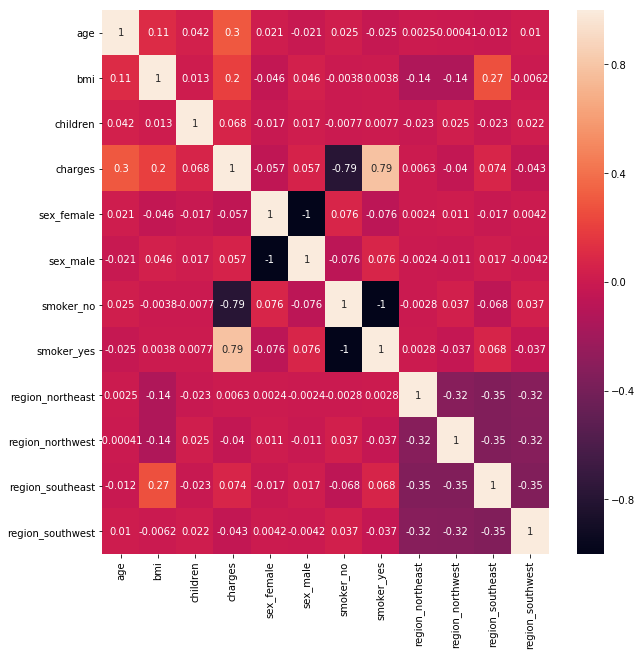

In [12]:
#confir  the relacionship between charges and others, regions and smokers.
fig, ax = plt.subplots(figsize=(10,10)) 
sns.heatmap(one_hot_df.corr(), annot=True, ax=ax)

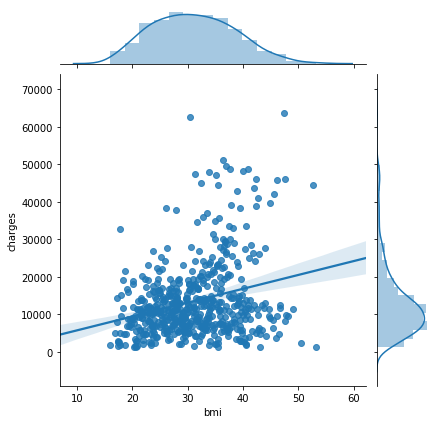

In [13]:
bmi = one_hot_df[["bmi", "charges"]].groupby(["bmi"], as_index=False).mean()
sns.jointplot(bmi["bmi"], bmi["charges"], kind="reg")

C:\Users\nakajima.kaori\AppData\Local\Continuum\miniconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


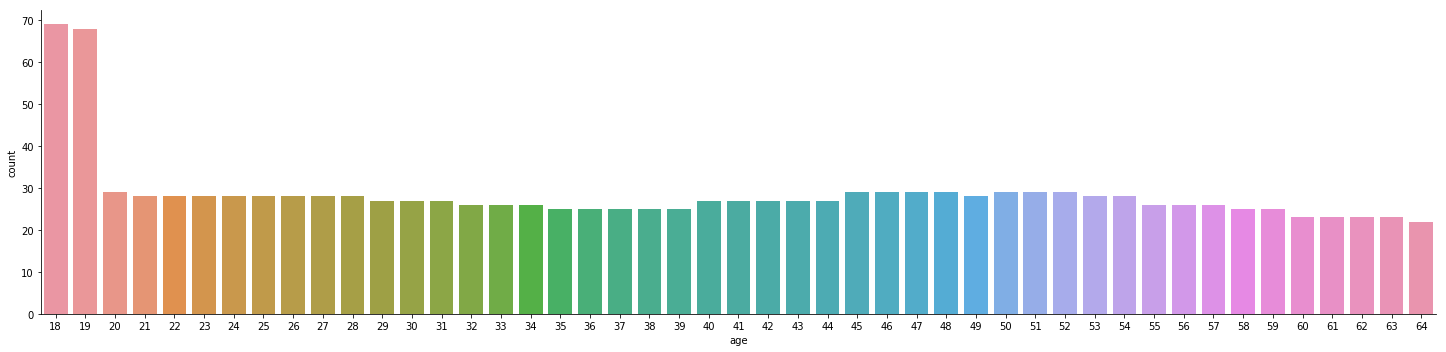

In [14]:
sns.factorplot(data=one_hot_df, x="age", kind="count", aspect=4)

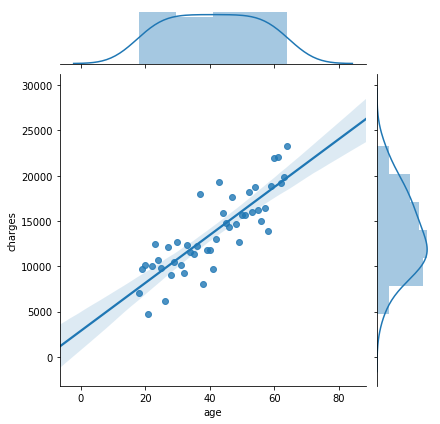

In [15]:
age = medical[["age", "charges"]].groupby(["age"], as_index=False).mean()
sns.jointplot(age["age"], age["charges"], kind="reg")

C:\Users\nakajima.kaori\AppData\Local\Continuum\miniconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


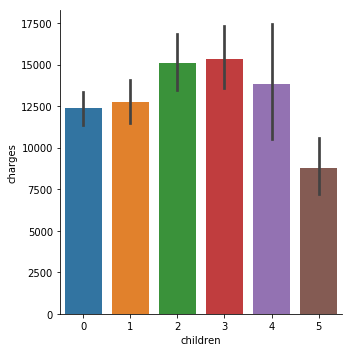

In [16]:
sns.factorplot(data=one_hot_df, x="children", y="charges", kind="bar")

In [17]:
one_hot_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 12 columns):
age                 1338 non-null int64
bmi                 1338 non-null float64
children            1338 non-null int64
charges             1338 non-null float64
sex_female          1338 non-null uint8
sex_male            1338 non-null uint8
smoker_no           1338 non-null uint8
smoker_yes          1338 non-null uint8
region_northeast    1338 non-null uint8
region_northwest    1338 non-null uint8
region_southeast    1338 non-null uint8
region_southwest    1338 non-null uint8
dtypes: float64(2), int64(2), uint8(8)
memory usage: 52.3 KB


In [18]:
X = one_hot_df.drop(["children", "charges"], axis=1)
y = one_hot_df["charges"]
X.shape, y.shape

((1338, 10), (1338,))

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state = 0)

In [20]:
X_train.shape, y_test.shape, 

((1003, 10), (335,))

In [21]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
lr.score(X_test, y_test)

0.7931088834373372

In [22]:
ri = Ridge()
ri.fit(X_train, y_train)
y_pred = ri.predict(X_test)
ri.score(X_test, y_test)

0.7930038129323826

In [23]:
rm = RandomForestRegressor(n_estimators=200)
rm.fit(X_train, y_train)
rm.score(X_test, y_test)

0.8647296601916125

In [24]:
rm.score(X_train, y_train)

0.9737720878066145